In [51]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pymannkendall as mk
import re
from tqdm import tqdm
import emoji
import pprint

In [2]:
#Read the dataset
data = pd.read_csv('news_articles.csv')

In [3]:
#five rows in the dataset
data.head()

,Date,Title,Publisher,Body
0,"Publication date: Apr 26, 2020\n",Title: Ghana's dancing pallbearers go global\n,Publisher: WP Company LLC d/b/a The Washington...,['Full text: You may have seen them on the Int...
1,"Publication date: Apr 26, 2020\n",Title: Renowned choreographer moves rehearsals...,Publisher: WP Company LLC d/b/a The Washington...,"['Full text: ""Back up,"" choreographer Mark Mor..."
2,"Publication date: Apr 26, 2020\n",Title: A sign of the times: Airbnb's global ex...,Publisher: WP Company LLC d/b/a The Washington...,['Full text: I was the second person to arrive...
3,"Publication date: Apr 24, 2020\n",Title: House passes $484 billion in aid\n,Publisher: WP Company LLC d/b/a The Washington...,['Full text: latest bid to stem economic plung...
4,"Publication date: Apr 24, 2020\n",Title: Young is the one\n,Publisher: WP Company LLC d/b/a The Washington...,"[""Full text: Ron Rivera's first draft pick as ..."


In [4]:
#Number of rows in dataframe
print(len(data))
print(data['Title'].nunique())

25460
22934


# Cleaning the data

In [5]:
#Drop duplicate rows
data = data.drop_duplicates()
len(data)

24391

In [6]:
data['Date'] = data['Date'].apply(lambda x:x[-13:-1])
data['Title'] = data['Title'].apply(lambda x:x[7:])
data['Publisher'] = data['Publisher'].apply(lambda x:x[11:])
data['Body'] = data['Body'].apply(lambda x : x[13:-1])

In [7]:
data.head()

,Date,Title,Publisher,Body
0,"Apr 26, 2020",Ghana's dancing pallbearers go global\n,WP Company LLC d/b/a The Washington Post\n,You may have seen them on the Internet: six me...
1,"Apr 26, 2020",Renowned choreographer moves rehearsals to Zoom\n,WP Company LLC d/b/a The Washington Post\n,"""Back up,"" choreographer Mark Morris says to h..."
2,"Apr 26, 2020",A sign of the times: Airbnb's global experienc...,WP Company LLC d/b/a The Washington Post\n,I was the second person to arrive at the Scott...
3,"Apr 24, 2020",House passes $484 billion in aid\n,WP Company LLC d/b/a The Washington Post\n,"latest bid to stem economic plunge\n', 'Funds ..."
4,"Apr 24, 2020",Young is the one\n,WP Company LLC d/b/a The Washington Post\n,Ron Rivera's first draft pick as the Washingto...


In [8]:
#replacing the data values that are not of date format with null values
data['Date'] = pd.to_datetime(data['Date'], errors = 'coerce')

In [9]:
print(len(data))
data = data[~data['Date'].isna()]
print(len(data))

24391
24329


In [10]:
data.head()

,Date,Title,Publisher,Body
0,2020-04-26,Ghana's dancing pallbearers go global\n,WP Company LLC d/b/a The Washington Post\n,You may have seen them on the Internet: six me...
1,2020-04-26,Renowned choreographer moves rehearsals to Zoom\n,WP Company LLC d/b/a The Washington Post\n,"""Back up,"" choreographer Mark Morris says to h..."
2,2020-04-26,A sign of the times: Airbnb's global experienc...,WP Company LLC d/b/a The Washington Post\n,I was the second person to arrive at the Scott...
3,2020-04-24,House passes $484 billion in aid\n,WP Company LLC d/b/a The Washington Post\n,"latest bid to stem economic plunge\n', 'Funds ..."
4,2020-04-24,Young is the one\n,WP Company LLC d/b/a The Washington Post\n,Ron Rivera's first draft pick as the Washingto...


In [11]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month_name()
data['Day'] = data['Date'].dt.day_name()

In [12]:
print(min(data['Date']))
print(max(data['Date']))

2020-01-31 00:00:00
2021-12-31 00:00:00


In [13]:
cats = ['January', 'February', 'March', 'April','May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data['Month'] = pd.Categorical(data['Month'], categories = cats, ordered = True)
data = data.sort_values(['Year', 'Month', 'Day']).copy()

In [14]:
data.head()

,Date,Title,Publisher,Body,Year,Month,Day
18107,2020-01-31,Wall Street Shrugs Off Virus Worries: [Busines...,New York Times Company\n,Global stocks fell as economists revised their...,2020,January,Friday
18092,2020-02-21,"Virus Looms, Dragging Markets Down: [Business/...",New York Times Company\n,U.S. stocks spun lower in a dizzying day of tr...,2020,February,Friday
18094,2020-02-28,Stockpiling Supplies and Working Through Outbr...,New York Times Company\n,No confirmed cases have appeared in the city o...,2020,February,Friday
18108,2020-02-14,Why Numbers for the Sickened and the Fatalitie...,New York Times Company\n,A new way of counting used by the Chinese auth...,2020,February,Friday
20196,2020-02-28,China Bans Consuming And Trading Wildlife: [Fo...,New York Times Company\n,The coronavirus epidemic prompted China to per...,2020,February,Friday


# Cleaning text data in articles

In [15]:
#Remove url
data.loc[:,'Body'] = data['Body'].apply(lambda x : re.sub(r'http\S+', '', x))
data.loc[:,'Body'] = data['Body'].apply(lambda x : re.sub(r'www\.[^ ]+', '', x))


In [16]:
#Remove emails
data.loc[:, 'Body'] = data['Body'].apply(lambda x : re.sub('([A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,})', '',x))

In [17]:
#Check if the articles have hashtags
data= data.reset_index()
#Find all mentions in tweets
hashtags = []
for i in tqdm(range(len(data))):
    hashtag = re.findall('#(\w+)', data['Body'][i])
    if len(hashtag) != 0:
        hashtags.extend(hashtag)
print(len(hashtags))

100%|██████████████████████████████████| 24329/24329 [00:00<00:00, 97081.02it/s]

568


In [20]:
#Remove hashtags
tqdm.pandas()
data.loc[:, 'Body'] = data['Body'].progress_apply(lambda x : re.sub('#(\w+)', '',x))

100%|█████████████████████████████████| 24329/24329 [00:00<00:00, 169989.87it/s]


In [21]:
data['Body'][0]

'Global stocks fell as economists revised their outlooks on the impact of the virus, but the S&P 500 was up slightly by the end of the day.\\n\', \'Wall Street shook off growing fears that a mysterious and fast-moving virus in China could hurt the global economy, even as international markets were hit by those concerns on Thursday.\\n\', \'After an early decline, the S&P 500 staged an afternoon rally to close 0.3 percent higher. The market was buttressed by strong earnings from blue-chip companies including Microsoft, Coca-Cola and Hershey as well as a rally in financial shares.\\n\', \'In recent days, the global economic outlook has darkened in the face of the expanding outbreak.\\n\', \'The vast majority of people infected by coronavirus are in China, but governments around the world are taking steps to contain the disease, and the risk to investors is that those efforts dampen economic activity. Russia closed part of its 2,600-mile border with China on Thursday, and a number of coun

In [22]:
#Remove next line character
data['Body'] = data['Body'].apply(lambda x : re.sub(r'\\n', ' ', x))

In [23]:
#Remove special character
data['Body'] = data['Body'].apply(lambda x : re.sub('[!"#%“[•►–&”\'()*+,-/:;<=>?@/\\\^_{|}~`]', ' ', x))

In [24]:
#Remove numbers
data.loc[:, 'Body'] = data['Body'].apply(lambda x : re.sub('(\d)', ' ',x))

In [25]:
#Remove stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

tqdm.pandas()
data['Body'] =  data['Body'].progress_apply(lambda words: ' '.join(word.lower() for word in words.split(' ') if word not in stop))


100%|████████████████████████████████████| 24329/24329 [01:11<00:00, 341.72it/s]


In [26]:
#Remove extra spaces
data['Body'] = data['Body'].apply(lambda x : re.sub(' +', ' ', x))

In [27]:
#Lemmatization
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk


lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])
tqdm.pandas()
data["Body"] = data["Body"].progress_apply(lambda text: lemmatize_words(text))

100%|█████████████████████████████████████| 24329/24329 [12:12<00:00, 33.23it/s]


In [28]:
data.to_csv('cleaned_news_data.csv', index=False)

# Sentiment Analysis

In [30]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rosni/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [31]:
data = pd.read_csv('cleaned_news_data.csv')

In [32]:
sid = SentimentIntensityAnalyzer()
data['scores'] = data['Body'].apply(lambda text: sid.polarity_scores(str(text)))
data['compound'] = data['scores'].apply(lambda score_dict: score_dict['compound'])
data['sentiment_type']=''
data.loc[data.compound>=0.5,'sentiment_type']='POSITIVE'
data.loc[(data.compound > -0.5) & (data.compound < 0.5),'sentiment_type']='NEUTRAL'
data.loc[data.compound<= -0.5,'sentiment_type']='NEGATIVE'

In [33]:
data.head()

,index,Date,Title,Publisher,Body,Year,Month,Day,scores,compound,sentiment_type
0,18107,2020-01-31 00:00:00,Wall Street Shrugs Off Virus Worries: [Busines...,New York Times Company\n,global stock fell economist revise outlooks im...,2020,January,Friday,"{'neg': 0.129, 'neu': 0.731, 'pos': 0.14, 'com...",0.1049,NEUTRAL
1,18092,2020-02-21 00:00:00,"Virus Looms, Dragging Markets Down: [Business/...",New York Times Company\n,u s stock spin low dizzying day trading thursd...,2020,February,Friday,"{'neg': 0.142, 'neu': 0.764, 'pos': 0.094, 'co...",-0.9774,NEGATIVE
2,18094,2020-02-28 00:00:00,Stockpiling Supplies and Working Through Outbr...,New York Times Company\n,no confirmed case appear city state official b...,2020,February,Friday,"{'neg': 0.148, 'neu': 0.777, 'pos': 0.075, 'co...",-0.9983,NEGATIVE
3,18108,2020-02-14 00:00:00,Why Numbers for the Sickened and the Fatalitie...,New York Times Company\n,a new way counting use chinese authority catch...,2020,February,Friday,"{'neg': 0.139, 'neu': 0.711, 'pos': 0.15, 'com...",0.2586,NEUTRAL
4,20196,2020-02-28 00:00:00,China Bans Consuming And Trading Wildlife: [Fo...,New York Times Company\n,the coronavirus epidemic prompt china permanen...,2020,February,Friday,"{'neg': 0.147, 'neu': 0.788, 'pos': 0.065, 'co...",-0.9710,NEGATIVE


In [34]:
data = data.sort_values(by='Date')

In [35]:
data.head()

,index,Date,Title,Publisher,Body,Year,Month,Day,scores,compound,sentiment_type
0,18107,2020-01-31 00:00:00,Wall Street Shrugs Off Virus Worries: [Busines...,New York Times Company\n,global stock fell economist revise outlooks im...,2020,January,Friday,"{'neg': 0.129, 'neu': 0.731, 'pos': 0.14, 'com...",0.1049,NEUTRAL
11,19059,2020-02-02 00:00:00,This Week in Business: Coronavirus Hits the Wo...,New York Times Company\n,whether escape choice football j lo buffalo ch...,2020,February,Sunday,"{'neg': 0.176, 'neu': 0.675, 'pos': 0.149, 'co...",-0.9604,NEGATIVE
14,17967,2020-02-04 00:00:00,"Markets Rise, but Virus Worries Loom: [Busines...",New York Times Company\n,stock rise much world monday recover loss earl...,2020,February,Tuesday,"{'neg': 0.152, 'neu': 0.739, 'pos': 0.11, 'com...",-0.9493,NEGATIVE
17,19060,2020-02-12 00:00:00,Powell Warns of Fallout From Virus: [Business/...,New York Times Company\n,the virus could affect global economy federal ...,2020,February,Wednesday,"{'neg': 0.122, 'neu': 0.728, 'pos': 0.15, 'com...",0.9545,POSITIVE
3,18108,2020-02-14 00:00:00,Why Numbers for the Sickened and the Fatalitie...,New York Times Company\n,a new way counting use chinese authority catch...,2020,February,Friday,"{'neg': 0.139, 'neu': 0.711, 'pos': 0.15, 'com...",0.2586,NEUTRAL


In [40]:
pos_news = data[data['sentiment_type'] == 'POSITIVE']
neg_news = data[data['sentiment_type'] == 'NEGATIVE']
neu_news = data[data['sentiment_type'] == 'NEUTRAL']

In [41]:
pos_news = pos_news.drop('index', axis=1)
neg_news = neg_news.drop('index', axis=1)
neu_news = neu_news.drop('index', axis=1)

pos_news = pos_news.reset_index()
neg_news = neg_news.reset_index()
neu_news = neu_news.reset_index()

pos_news = pos_news.drop('index', axis = 1)
neg_news = neg_news.drop('index', axis = 1)
neu_news = neu_news.drop('index', axis = 1)

In [42]:
pos_news.head()

,Date,Title,Publisher,Body,Year,Month,Day,scores,compound,sentiment_type
0,2020-02-12 00:00:00,Powell Warns of Fallout From Virus: [Business/...,New York Times Company\n,the virus could affect global economy federal ...,2020,February,Wednesday,"{'neg': 0.122, 'neu': 0.728, 'pos': 0.15, 'com...",0.9545,POSITIVE
1,2020-02-16 00:00:00,"As Crisis Spirals, U.S. Will Evacuate American...",New York Times Company\n,in china assurance people go back work officia...,2020,February,Sunday,"{'neg': 0.086, 'neu': 0.775, 'pos': 0.139, 'co...",0.9925,POSITIVE
2,2020-02-19 00:00:00,"Despite Virus, Walmart Sticks to Sales Forecas...",New York Times Company\n,the world large retailer say would continue mo...,2020,February,Wednesday,"{'neg': 0.067, 'neu': 0.791, 'pos': 0.141, 'co...",0.9917,POSITIVE
3,2020-02-23 00:00:00,'All Hands on Deck' as U.S. Health Workers Tra...,New York Times Company\n,local health department around united state sc...,2020,February,Sunday,"{'neg': 0.085, 'neu': 0.818, 'pos': 0.097, 'co...",0.8979,POSITIVE
4,2020-02-27 00:00:00,Gilead Adds Drug Trials At Hospitals Across As...,New York Times Company\n,the drug maker say march would begin two clini...,2020,February,Thursday,"{'neg': 0.095, 'neu': 0.74, 'pos': 0.165, 'com...",0.9835,POSITIVE


In [43]:
pos_news['Date'] = pd.to_datetime(pos_news['Date'])
neg_news['Date'] = pd.to_datetime(neg_news['Date'])
neu_news['Date'] = pd.to_datetime(neu_news['Date'])

In [44]:
news_per_week_pos = pos_news.groupby([pd.Grouper(key='Date', freq='W')]).size()
news_per_week_neg = neg_news.groupby([pd.Grouper(key='Date', freq='W')]).size()
news_per_week_neu = neu_news.groupby([pd.Grouper(key='Date', freq='W')]).size()

In [45]:
news_per_week_pos = pd.DataFrame(news_per_week_pos)
news_per_week_neg = pd.DataFrame(news_per_week_neg)
news_per_week_neu = pd.DataFrame(news_per_week_neu)

In [46]:
news_per_week_pos = news_per_week_pos.reset_index()
news_per_week_neg = news_per_week_neg.reset_index()
news_per_week_neu = news_per_week_neu.reset_index()

In [47]:
news_per_week_pos.columns = ['Date', 'Number']
news_per_week_neg.columns = ['Date', 'Number']
news_per_week_neu.columns = ['Date', 'Number']

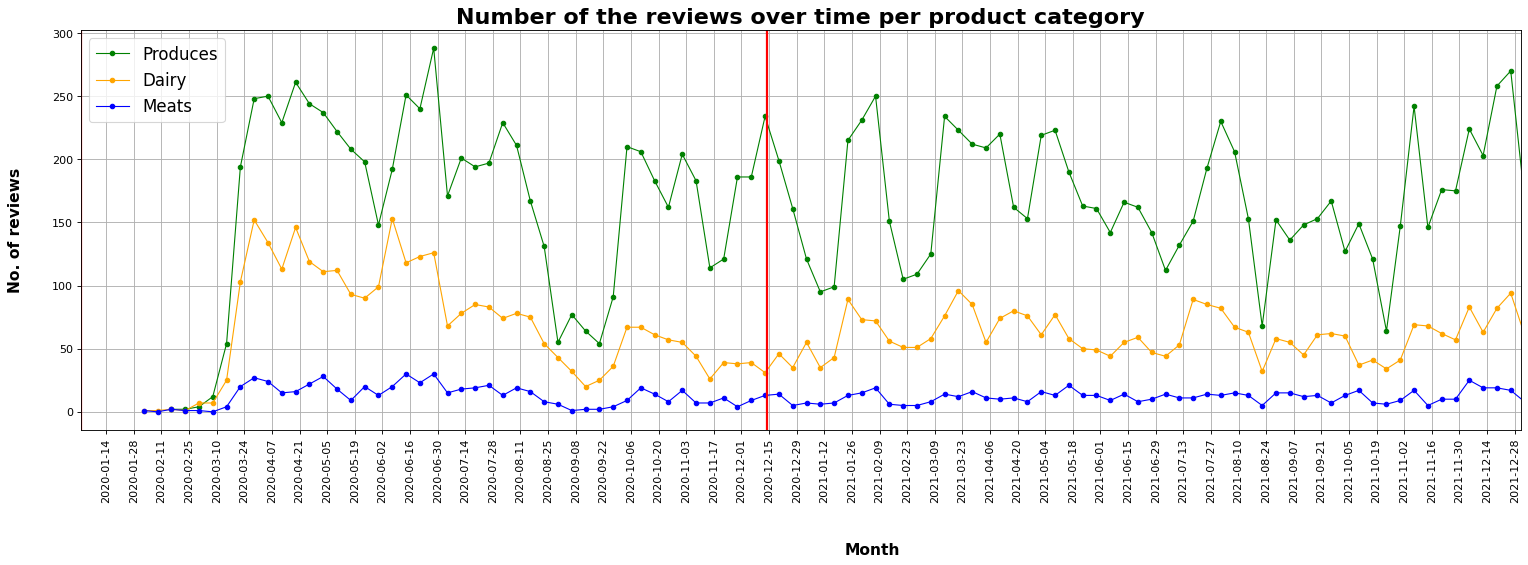

In [52]:
fig = plt.figure(figsize=(6, 5), dpi=80)
ax = fig.add_axes([0,0,3,1])
ax.plot(news_per_week_pos['Date'], news_per_week_pos['Number'], color='green',marker='o',linewidth=1, markersize=4, label='Produces')
ax.plot(news_per_week_neg['Date'], news_per_week_neg['Number'], color='orange',marker='o',linewidth=1, markersize=4, label = 'Dairy')
ax.plot(news_per_week_neu['Date'], news_per_week_neu['Number'], color='blue',marker='o',linewidth=1, markersize=4, label = 'Meats')
ax.set_ylabel('No. of reviews', fontsize = 14,fontweight="bold")
ax.set_xlabel('Month', fontsize =14 ,fontweight="bold", labelpad=40)
ax.xaxis.set_label_coords(.55, -.28)
ax.yaxis.set_label_coords(-.04,.5)
ax.set_xlim([pd.to_datetime('2020-01-01T00:00:00.000000000'), pd.to_datetime('2021-12-31T00:00:00.000000000')])
ax.set_title('Number of the reviews over time per product category',fontsize=20,fontweight="bold")
plt.axvline(x=pd.to_datetime('2020-1-1'), color = 'r', lw=2)
plt.axvline(x=pd.to_datetime('2020-12-14'), color = 'r', lw=2)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
plt.xticks(rotation = 90)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.legend(loc="upper left", prop={'size': 15})
plt.grid()
plt.show()

In [53]:
#Merge dataframes of all sentiments
pos_neg = pd.merge(news_per_week_pos, news_per_week_neg,on = 'Date')
all_data = pd.merge(pos_neg, news_per_week_neu, on = 'Date')

In [54]:
all_data

,Date,Number_x,Number_y,Number
0,2020-02-16,2,2,2
1,2020-02-23,2,1,1
2,2020-03-01,4,7,1
3,2020-03-08,12,7,0
4,2020-03-15,54,25,4
...,...,...,...,...
94,2021-12-05,224,83,25
95,2021-12-12,203,63,19
96,2021-12-19,258,82,19
97,2021-12-26,270,94,17


In [55]:
all_data.columns = ['Date', 'positive', 'negative', 'neutral']

In [57]:
all_data['total'] = all_data['positive'] + all_data['negative'] + all_data['neutral']

In [58]:
all_data['pos_norm'] = all_data['positive']/all_data['total']
all_data['neg_norm'] = all_data['negative']/all_data['total']
all_data['neu_norm'] = all_data['neutral']/all_data['total']

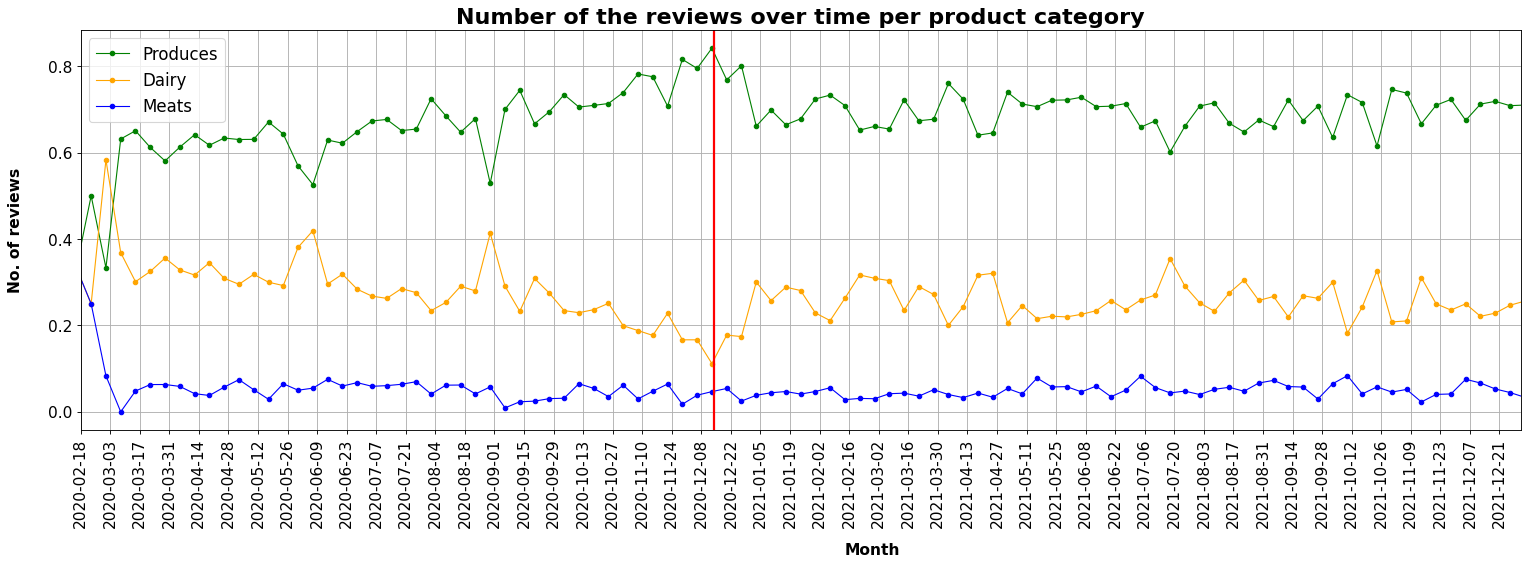

In [68]:
fig = plt.figure(figsize=(6, 5), dpi=80)
ax = fig.add_axes([0,0,3,1])
ax.plot(all_data['Date'], all_data['pos_norm'], color='green',marker='o',linewidth=1, markersize=4, label='Produces')
ax.plot(all_data['Date'], all_data['neg_norm'], color='orange',marker='o',linewidth=1, markersize=4, label = 'Dairy')
ax.plot(all_data['Date'], all_data['neu_norm'], color='blue',marker='o',linewidth=1, markersize=4, label = 'Meats')
ax.set_ylabel('No. of reviews', fontsize = 14,fontweight="bold")
ax.set_xlabel('Month', fontsize =14 ,fontweight="bold", labelpad=40)
ax.xaxis.set_label_coords(.55, -.28)
ax.yaxis.set_label_coords(-.04,.5)
ax.set_xlim([pd.to_datetime('2020-02-18T00:00:00.000000000'), pd.to_datetime('2021-12-31T00:00:00.000000000')])
ax.set_title('Number of the reviews over time per product category',fontsize=20,fontweight="bold")
plt.axvline(x=pd.to_datetime('2020-1-1'), color = 'r', lw=2)
plt.axvline(x=pd.to_datetime('2020-12-14'), color = 'r', lw=2)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
plt.xticks(rotation = 90)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.legend(loc="upper left", prop={'size': 15})
plt.grid()
plt.show()

# Mann Kendall Trend test

In [69]:
df_after_covid = all_data[(all_data['Date'] >= '2020-01-01') & (all_data['Date'] <= '2020-12-15')]
df_after_vaccine = all_data[(all_data['Date'] >= '2020-12-15')]

In [70]:
print(mk.original_test(all_data['pos_norm']))
print(mk.original_test(all_data['neg_norm']))
print(mk.original_test(all_data['neu_norm']))

Mann_Kendall_Test(trend='increasing', h=True, p=1.1042699962438007e-05, z=4.395679042207898, Tau=0.29993815708101423, s=1455.0, var_s=109415.0, slope=0.0008372194029168389, intercept=0.6372096877428793)
Mann_Kendall_Test(trend='decreasing', h=True, p=5.09719990846591e-05, z=-4.051124850378496, Tau=-0.2764378478664193, s=-1341.0, var_s=109410.33333333333, slope=-0.0007464636285596985, intercept=0.2992885822062049)
Mann_Kendall_Test(trend='no trend', h=False, p=0.3757258968580106, z=-0.8857989108438977, Tau=-0.06060606060606061, s=-294.0, var_s=109412.0, slope=-5.3828034501617004e-05, intercept=0.05263757369057924)


In [71]:
print(mk.original_test(df_after_covid['pos_norm']))
print(mk.original_test(df_after_covid['neg_norm']))
print(mk.original_test(df_after_covid['neu_norm']))

Mann_Kendall_Test(trend='increasing', h=True, p=2.822897471332908e-11, z=6.655525025747079, Tau=0.6966173361522199, s=659.0, var_s=9774.333333333334, slope=0.004886454425286832, intercept=0.5476871104779746)
Mann_Kendall_Test(trend='decreasing', h=True, p=1.6558190374382775e-09, z=-6.0284086859350445, Tau=-0.63107822410148, s=-597.0, var_s=9774.333333333334, slope=-0.003968915464187333, intercept=0.3732979693537595)
Mann_Kendall_Test(trend='decreasing', h=True, p=0.016526307625580827, z=-2.3970801648069564, Tau=-0.25158562367864695, s=-238.0, var_s=9775.333333333334, slope=-0.0006458502971637084, intercept=0.0698544702344209)


In [72]:
print(mk.original_test(df_after_vaccine ['pos_norm']))
print(mk.original_test(df_after_vaccine ['neg_norm']))
print(mk.original_test(df_after_vaccine ['neu_norm']))

Mann_Kendall_Test(trend='no trend', h=False, p=0.8845602281385829, z=-0.14519080172812557, Tau=-0.014141414141414142, s=-21.0, var_s=18975.0, slope=-2.3196166667770547e-05, intercept=0.7082534151440976)
Mann_Kendall_Test(trend='no trend', h=False, p=0.8219390759428922, z=-0.2250516729720902, Tau=-0.02154882154882155, s=-32.0, var_s=18974.0, slope=-9.185773074661872e-05, intercept=0.254787851037851)
Mann_Kendall_Test(trend='increasing', h=True, p=0.023061414833644767, z=2.2724156917501177, Tau=0.21144781144781144, s=314.0, var_s=18972.0, slope=0.0002699008633367359, intercept=0.039692542461720215)
